# IIA - TP2


#### Consigna
Se requiere construir un modelo de regresión que permita predecir el valor medio de las casas en distintos distritos de California, EE. UU. (medido en cientos de miles de dólares, es decir, $100,000). Este conjunto de datos proviene del censo de EE. UU. de 1990, donde cada observación corresponde a un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra, y típicamente tiene una población de entre 600 y 3.000 personas.

Los atributos, en el orden en que se presentan en el conjunto de datos, son:

- __MedInc:__ Ingreso medio en el bloque
- __HouseAge:__ Edad mediana de las casas en el bloque
- __AveRooms:__ Número promedio de habitaciones por hogar
- __AveBedrms:__ Número promedio de dormitorios por hogar
- __Population:__ Población del bloque
- __AveOccup:__ Número promedio de personas por hogar
- __Latitude:__ Latitud del bloque
- __Longitude:__ Longitud del bloque

El target es:

__MedHouseVal:__ Mediana del valor de las casas en el bloque (en unidades de $100,000)
#### Tareas y preguntas a resolver:

Obtener la correlación entre los atributos y entre los atributos y el target.
* ¿Qué atributo tiene mayor correlación lineal con el target? 
* ¿Cuáles atributos parecen estar más correlacionados entre sí? Se pueden calcular los coeficientes de correlación o representarlos gráficamente mediante un mapa de calor.
* Graficar los histogramas de los distintos atributos y del target. 
* ¿Qué forma presentan los histogramas?
* ¿Alguno muestra una distribución similar a una campana que sugiera una distribución gaussiana, sin necesidad de realizar pruebas de hipótesis?
* Calcular una regresión lineal utilizando todos los atributos. 
* Con el conjunto de entrenamiento, calcular la varianza total de los datos y la varianza explicada por el modelo.
* ¿Está el modelo capturando adecuadamente el comportamiento del target? Fundamente su respuesta.
* Calcular las métricas de MSE, MAE y R² sobre el conjunto de evaluación.
* Crear una regresión de Ridge. 
* Usar validación cruzada de 5 folds y tomar como métrica el MSE.
* Buscar el mejor valor de α en el rango [0, 12.5].
* Graficar el MSE en función de α.
* Comparar los resultados obtenidos entre la regresión lineal y la mejor regresión de Ridge, evaluando el conjunto de prueba.
* ¿Cuál de los dos modelos obtiene mejores resultados en términos de MSE y MAE? ¿Poseen suficiente diferencia como para indicar si uno es mejor que el otro?
* ¿Qué tipo de error podría haberse reducido?

# Resolución


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge




In [2]:
# Inicialización de seaborn
sns.set_theme()

# Lectura del dataset
california_housing = fetch_california_housing()

# Obtenemos los atributos y el target:
X = california_housing.data
y = california_housing.target

# Transformamos los datos a estructuras de Pandas:
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos X e y; esto es útil para generar el mapa de calor de correlaciones
df_california = pd.concat([X, y], axis=1)

df_target = df_california['MedHouseVal'].copy()
df_features = df_california.drop('MedHouseVal', axis=1)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Mapa de calor

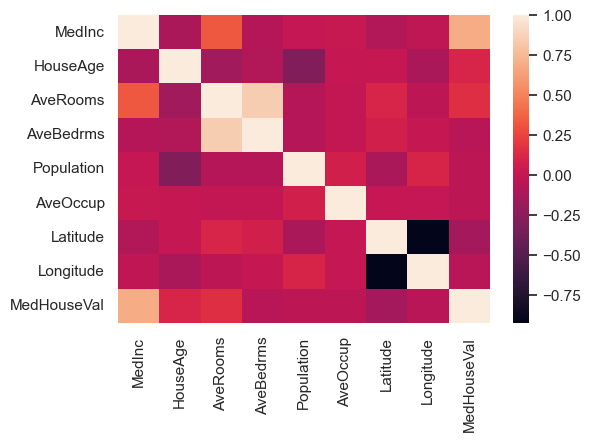

In [6]:
plt.figure(figsize=(6, 4))

correlation_matrix = df_california.corr()
sns.heatmap(correlation_matrix)

plt.show()

### Histograma

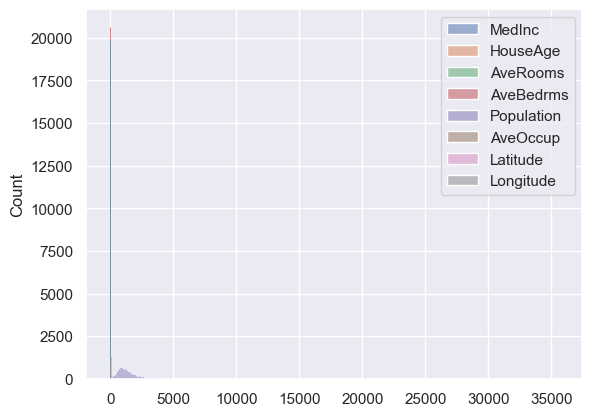

In [7]:
sns.histplot(df_features)
plt.show()

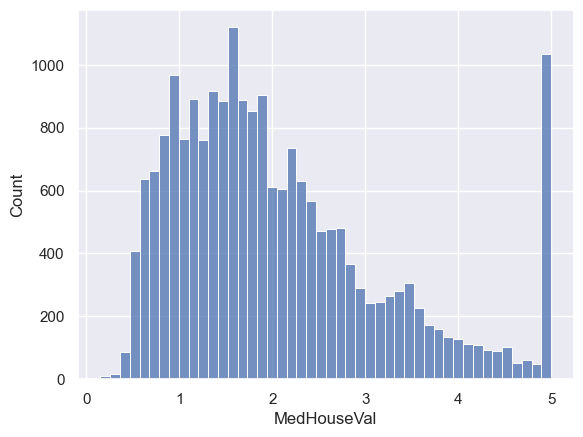

In [8]:
sns.histplot(df_target)
plt.show()